In [0]:
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from keras.models import Model

In [96]:
model=VGG16()
model.layers
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:

# summarize filter shapes
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights() 
  print(layer.name,filters.shape,biases.shape)

block1_conv1 (3, 3, 3, 64) (64,)
block1_conv2 (3, 3, 64, 64) (64,)
block2_conv1 (3, 3, 64, 128) (128,)
block2_conv2 (3, 3, 128, 128) (128,)
block3_conv1 (3, 3, 128, 256) (256,)
block3_conv2 (3, 3, 256, 256) (256,)
block3_conv3 (3, 3, 256, 256) (256,)
block4_conv1 (3, 3, 256, 512) (512,)
block4_conv2 (3, 3, 512, 512) (512,)
block4_conv3 (3, 3, 512, 512) (512,)
block5_conv1 (3, 3, 512, 512) (512,)
block5_conv2 (3, 3, 512, 512) (512,)
block5_conv3 (3, 3, 512, 512) (512,)


In [0]:
filt,bias=model.layers[1].get_weights()
f_min, f_max = filt.min(), filt.max()
filt= (filt - f_min) / (f_max - f_min)

In [89]:
model.layers

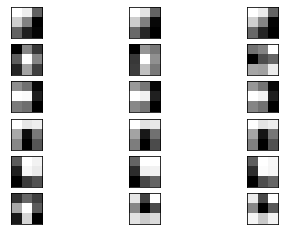

In [53]:

    
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filt[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [97]:
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[3].output)
print(model.layers)

[<keras.engine.input_layer.InputLayer object at 0x7f4ecc235898>, <keras.layers.convolutional.Conv2D object at 0x7f4eca37e940>, <keras.layers.convolutional.Conv2D object at 0x7f4eca37e518>, <keras.layers.pooling.MaxPooling2D object at 0x7f4eca383198>]


In [64]:
from google.colab import drive
drive .mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras.preprocessing.image import load_img
img = load_img('/content/gdrive/My Drive/Eopsaltria_australis_-_Mogo_Campground.jpg', target_size=(224, 224))


In [0]:
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
img = img_to_array(img)
img = expand_dims(img, axis=0)

In [69]:
img.shape

(1, 224, 224, 3)

In [0]:
from keras.applications.vgg16 import preprocess_input
img = preprocess_input(img)

In [0]:
feature_maps=model.predict(img)

In [99]:
feature_maps.shape

(1, 112, 112, 64)

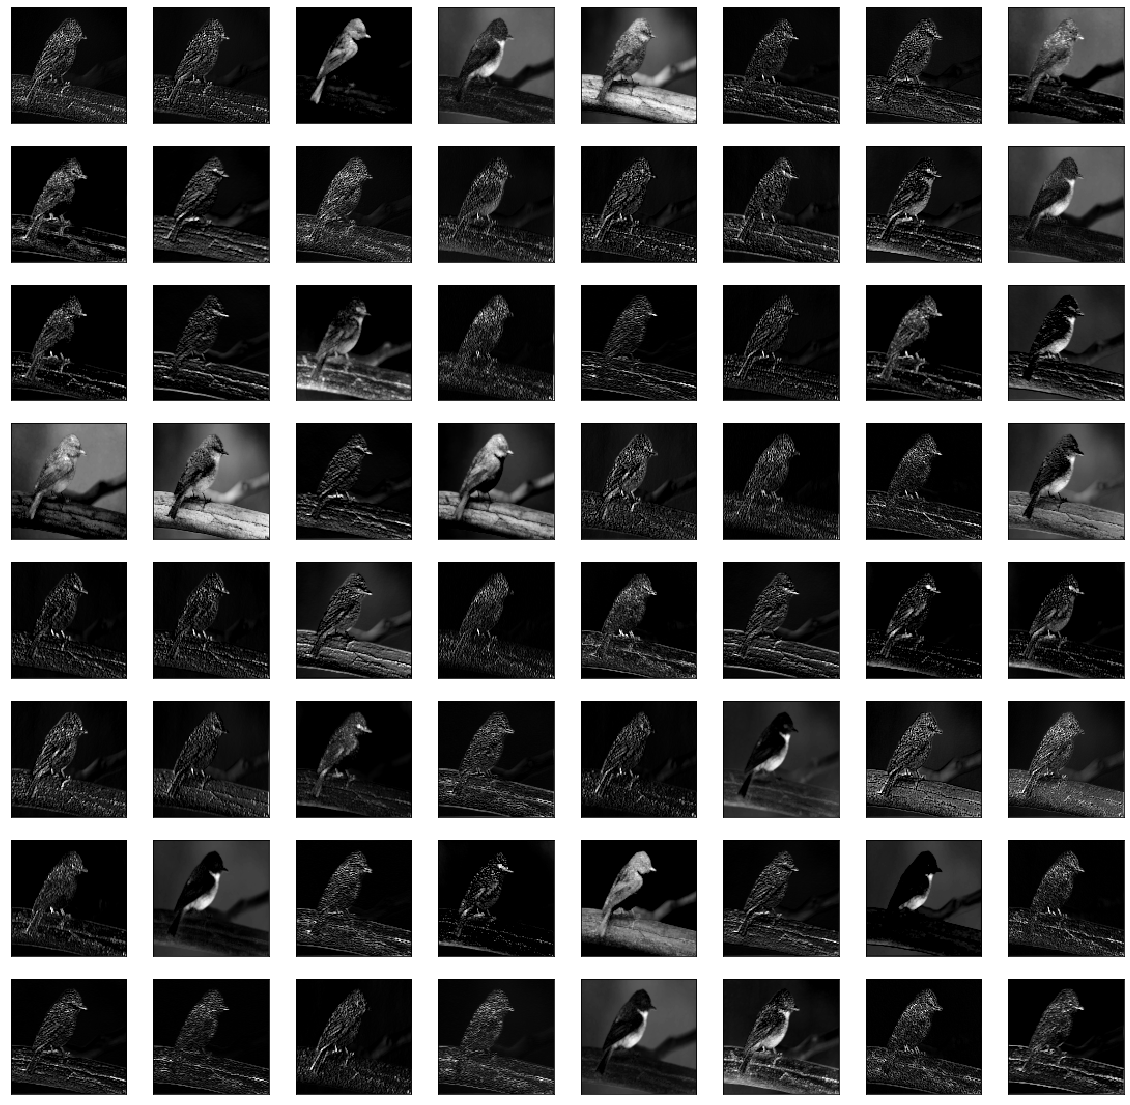

In [100]:
square = 8
ix = 1
plt.figure(figsize=(20,20))

for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()